<a href="https://colab.research.google.com/github/chumdan/Machine-Learning-Project/blob/main/%EB%AC%B8%EC%A0%9C1_%EC%8B%AC%EB%B6%80%EC%A0%84%EC%A6%9D%EC%9D%84_%EC%98%88%EB%B0%A9%ED%95%A0_%EC%88%98_%EC%9E%88%EC%9D%84%EA%B9%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까? (분류문제유형)

### Step 0. 필요패키지 다운 및 데이터셋 준비





#### 필요패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGB
from lightgbm import LGBMClassifier as LGBM
from sklearn.feature_selection import *
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'chumdan'
os.environ['KAGGLE_KEY'] = '0e8bf51ba50bce898a8a9736072bd3b8'

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 2.91MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


#### 데이터소개 

 - 다음 1개의 csv 파일을 사용합니다.


> 
    heart_failure_clinical_records_dataset.csv
    
- 각 파일의 컬럼은 아래와 같습니다.

> 
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    종속변수: DEATH_EVENT
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data



In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Step 1. 데이터 기초 통계 분석 및 그래프

#### 데이터프레임의 각 칼럼 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


#### 데이터 그래프 분석

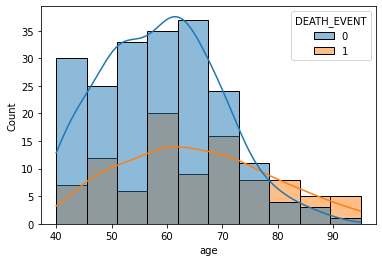

In [ ]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

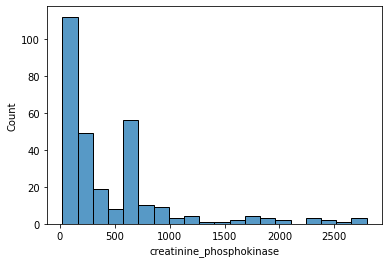

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

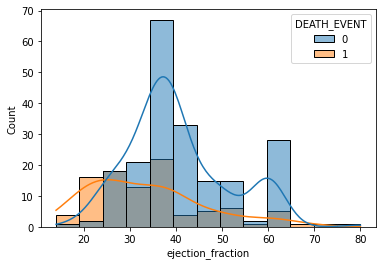

In [ ]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

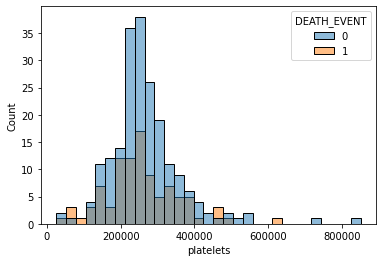

In [ ]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

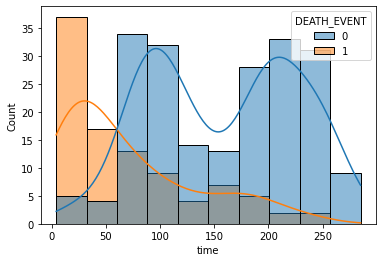

In [ ]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

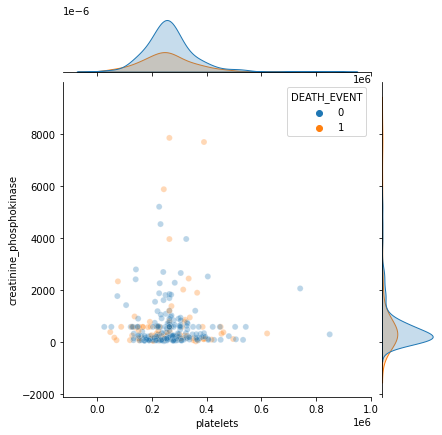

In [ ]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

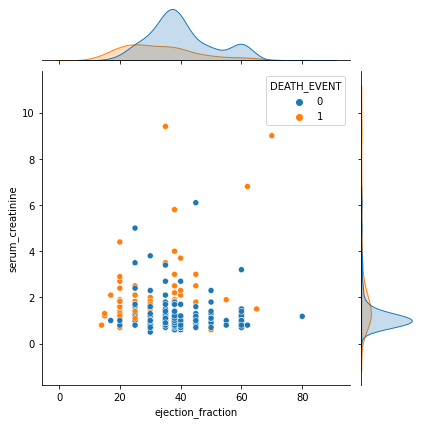

In [ ]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

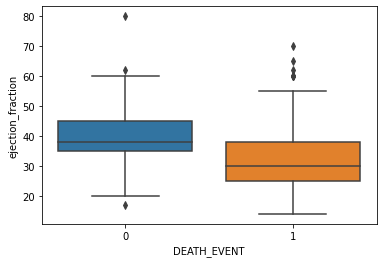

In [ ]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

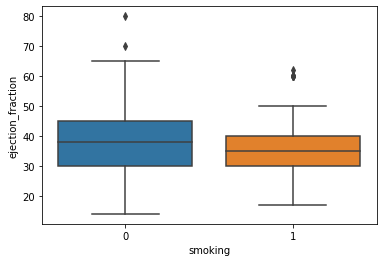

In [ ]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


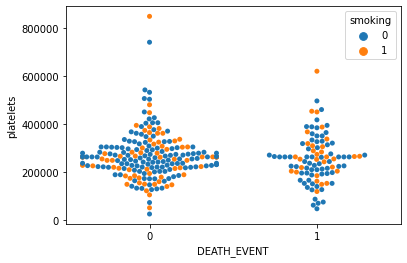

In [ ]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

### Step 2. 모델 학습을 위한 전처리

#### StandardScaler를 이용하여 데이터 전처리하기

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [ ]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


In [ ]:
# 범주형 변수가 모두 0, 1 이진변수로 원핫인코딩 패스.
for i in X_cat.columns:
  print(X_cat[i].unique())


[0 1]
[0 1]
[1 0]
[1 0]
[0 1]


#### 학습데이터와 테스트데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Step 3. Classification 모델 학습하기(y : binary 변수)

- 기본 모델은 로지스틱 모델로 설정.
-  모델이 단순하기 때문에 KNN, SVM, XGB, LGBM을 모두 하이퍼파라미터 조절을 통해 분석해본다.


#### 기본 모델 분석

In [ ]:
# 결정계수를 설정해서 가장 적합한 로지스틱분석의 결정계수를 정한다.
def LR_model_test(C):
    model_lr = LR(C = C, max_iter = 100000, random_state = 10).fit(X_train, y_train) # 가벼운 모델이므로 max_iter를 크게 잡았음
    y_pred_lr = model_lr.predict(X_test)
    return f1_score(y_test, y_pred_lr)

print("C = 0.1:\t{}".format(LR_model_test(C = 0.1)))
print("C = 0.3:\t{}".format(LR_model_test(C = 0.3))) 
print("C = 0.5:\t{}".format(LR_model_test(C = 0.5)))
print("C = 0.7:\t{}".format(LR_model_test(C = 0.7)))
print("C = 1:\t{}".format(LR_model_test(C = 1)))
# cut-off는 0.5로 했을 때, 가장 좋은 로지스틱 모델이 나온다.

C = 0.1:	0.29411764705882354
C = 0.3:	0.43243243243243246
C = 0.5:	0.46153846153846156
C = 0.7:	0.45
C = 1:	0.45


In [ ]:
model_lr = LR(C = 0.5, max_iter = 100000, random_state = 10)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        64
           1       0.69      0.35      0.46        26

    accuracy                           0.77        90
   macro avg       0.74      0.64      0.66        90
weighted avg       0.75      0.77      0.74        90



#### 파라미터 그리드 설계

In [ ]:
# 모델 파라미터 그리드 설계
# 키가 모델의 함수, 값이 파라미터 그리드의 값
param_grid = dict() 

param_grid_for_KNN = ParameterGrid({"n_neighbors": [3, 5, 7],
                                    "metric":['euclidean', 'manhattan']})

param_grid_for_SVM = ParameterGrid({"C": [0.1, 1, 10],
                                    "kernel":['rbf', 'linear']})

param_grid_for_XGB = ParameterGrid({"max_depth": [2, 3, 4],
                                    "n_estimators": [50, 100],
                                    "learning_rate": [0.05, 0.1, 0.15, 0.2]})

param_grid_for_LGBM = ParameterGrid({"max_depth": [2, 3, 4],
                                     "n_estimators": [50, 100],
                                     "learning_rate": [0.05, 0.1, 0.15, 0.2]})




param_grid[KNN] = param_grid_for_KNN
param_grid[SVC] = param_grid_for_SVM
param_grid[XGB] = param_grid_for_XGB
param_grid[LGBM] = param_grid_for_LGBM

# 출력을 위한 max_iter_num 계산
                           
# 튜닝 시작
best_score = 0
iteration_num = 0    
for k in range(30, 5, -1): 
    print(k)
  
    for model_func in [KNN, SVC, XGB, LGBM]:
        for param in param_grid[model_func]:
            model = model_func(**param).fit(X_train.values, y_train.values)
            y_pred = model.predict(X_test.values)
            score = f1_score(y_test, y_pred, average = 'micro')
            if score > best_score:
                best_model_func = model_func
                best_score = score
                best_parameter = param
            iteration_num += 1      


print("모델:", best_model_func)
print("점수:", best_score)
print("파라미터:", best_parameter)
        



30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
모델: <class 'xgboost.sklearn.XGBClassifier'>
점수: 0.8111111111111111
파라미터: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
final_model_xgb=XGB(max_depth=3, n_estimators=50,learning_rate=0.2)
final_model_xgb.fit(X_train, y_train)
pred_xgb = final_model_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

# 기본 모델인 로지스틱 모델에 비해서 f1-score가 0.05 상승했다.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



#### 특징중요도 파악

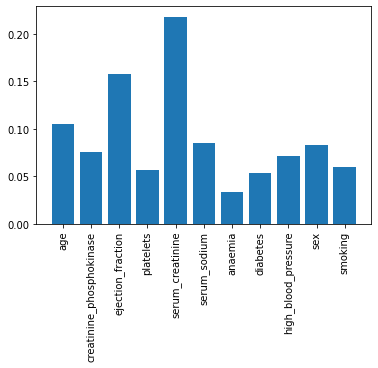

In [ ]:
plt.bar(X.columns, final_model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 가장 중요한 변수는 serum_creatinine: 혈중 크레아틴 레벨 (mg/dL) 이다.

#### Precision-Recall 커브와 ROC 커브 그리기

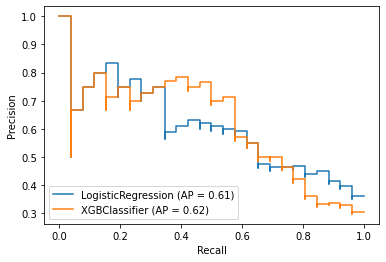

In [ ]:
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(final_model_xgb, X_test, y_test, ax=ax)

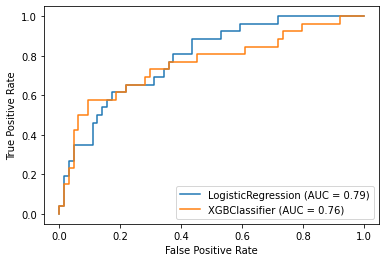

In [ ]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(final_model_xgb, X_test, y_test, ax=ax)

### Step 4. 딥러닝.신경망 모델로 분석

In [ ]:
from keras.optimizers import Adam


In [ ]:
print(X_train.shape, y_train.shape)

(209, 11) (209,)


#### 모델구현

In [ ]:
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',input_shape=(11,)))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(0.5))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())
  
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

#### 딥러닝 모델 학습

In [ ]:
# 콜백 함수 적용 부분(분류모델은 val_loss로)
early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# 분류모델이면 model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/practice/문제1_딥러닝파라미터/{epoch}-{loss:.2f}.h5', 
                                   monitor='val_loss', save_best_only=True, verbose=1)


history = model.fit(X_train, y_train, batch_size=16,  epochs=1000,
            callbacks=[early_stopping_callback, model_checkpoint],
            validation_data=(X_test, y_test))

Epoch 1/1000
14/14 [==============================] - 4s 38ms/step - loss: 0.7725 - acc: 0.5642 - val_loss: 0.6784 - val_acc: 0.6556

Epoch 00001: val_loss improved from inf to 0.67837, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제1_딥러닝파라미터/1-0.81.h5
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.7415 - acc: 0.5720 - val_loss: 0.6615 - val_acc: 0.7111

Epoch 00002: val_loss improved from 0.67837 to 0.66153, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제1_딥러닝파라미터/2-0.67.h5
Epoch 3/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.6283 - acc: 0.6765 - val_loss: 0.6532 - val_acc: 0.7222

Epoch 00003: val_loss improved from 0.66153 to 0.65325, saving model to /content/drive/MyDrive/Colab Notebooks/practice/문제1_딥러닝파라미터/3-0.61.h5
Epoch 4/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.5114 - acc: 0.7626 - val_loss: 0.6394 - val_acc: 0.7000

Epoch 000

#### 딥러닝 모델평가

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6300 - acc: 0.7222


[0.6300397515296936, 0.7222222089767456]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

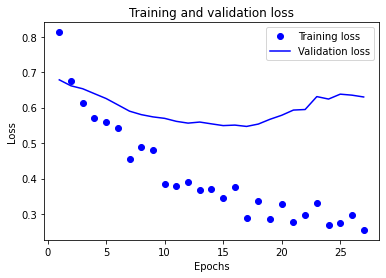

In [ ]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

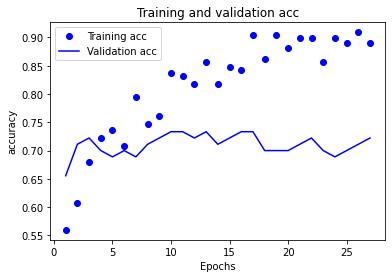

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()